### B028_24 (fastqc de las sec cruda)

In [ ]:
!fastqc -o B028_24 B028_24/BO28_24_1.fastq.gz B028_24/BO28_24_2.fastq.gz

In [1]:
!multiqc B028_24/ -o B028_24/multiqc_output/
from IPython.display import IFrame

IFrame("B028_24/multiqc_output/multiqc_report.html", width=1000, height=1000)


/// ]8;id=991396;https://multiqc.info\MultiQC]8;;\ 🔍 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_24
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 27/27   B028_24/BO28_24_2_fastqc.html
            fastqc | Found 2 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_24/multiqc_output/multiqc_data_1_2
     write_results | Report      : B028_24/multiqc_output/multiqc_report_2.html
           multiqc | MultiQC complete


In [29]:
!trimmomatic PE -threads 4 \
    B028_24/BO28_24_1.fastq.gz B028_24/BO28_24_2.fastq.gz \
    B028_24/BO28_24_1_paired.fq.gz B028_24/BO28_24_1_unpaired.fq.gz \
    B028_24/BO28_24_2_paired.fq.gz B028_24/BO28_24_2_unpaired.fq.gz \
      ILLUMINACLIP:TruSeq3-PE-2.fa:2:30:7 \
  LEADING:3 TRAILING:10 \
  SLIDINGWINDOW:4:18 \
  MINLEN:50
                                    
#intento 1: trailing 3 y minlen 36 y s. window 4:25   
#intento 2: trailing 25, milen 50 sw 4:20 (multiqc4)                                

TrimmomaticPE: Started with arguments:
 -threads 4 B028_24/BO28_24_1.fastq.gz B028_24/BO28_24_2.fastq.gz B028_24/BO28_24_1_paired.fq.gz B028_24/BO28_24_1_unpaired.fq.gz B028_24/BO28_24_2_paired.fq.gz B028_24/BO28_24_2_unpaired.fq.gz ILLUMINACLIP:TruSeq3-PE-2.fa:2:30:7 LEADING:3 TRAILING:10 SLIDINGWINDOW:4:18 MINLEN:50
Using PrefixPair: 'TACACTCTTTCCCTACACGACGCTCTTCCGATCT' and 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT'
Using Long Clipping Sequence: 'AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTA'
Using Long Clipping Sequence: 'AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT'
Using Long Clipping Sequence: 'TACACTCTTTCCCTACACGACGCTCTTCCGATCT'
ILLUMINACLIP: Using 1 prefix pairs, 4 forward/reverse sequences, 0 forward only sequences, 0 reverse only sequences
Quality encoding detected as phred33
Input Read Pairs: 15633318 Both Surviving: 14762176 (94,43%) Forward Only Surviving: 591237 (3,78%) Reverse Only Surviving: 142292 (0,91%) Dropped: 137613 (0,88%)


In [30]:
!trim_galore --paired \
  --clip_R1 10 --clip_R2 10 \
  --three_prime_clip_R1 10 --three_prime_clip_R2 10 \
  --quality 20 --length 50 \
  --fastqc -o B028_24/fastqc2 \
  --basename B028_24_trimgalore  \
  B028_24/BO28_24_1.fastq.gz B028_24/BO28_24_2.fastq.gz
#clips antes de 15 y q de 25

Multicore support not enabled. Proceeding with single-core trimming.
Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 4.4
single-core operation.
igzip command line interface 2.30.0
igzip detected. Using igzip for decompressing

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /home/male/Bacillus/B028_24/fastqc2/
Using user-specified basename (>>B028_24_trimgalore<<) instead of deriving the filename from the input file(s)
igzip: Error encountered while writing to file (null)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> B028_24/BO28_24_1.fastq.gz <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	1099	AGATCGGAAGAGC	1000000	0.11
smallRNA	0	TG

10000000 sequences processed
This is cutadapt 4.4 with Python 3.12.3
Command line parameters: -j 1 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC B028_24/BO28_24_2.fastq.gz
Processing single-end reads on 1 core ...
Finished in 720.124 s (46.063 µs/read; 1.30 M reads/minute).

=== Summary ===

Total reads processed:              15,633,318
Reads with adapters:                 4,983,480 (31.9%)
Reads written (passing filters):    15,633,318 (100.0%)

Total basepairs processed: 2,360,631,018 bp
Quality-trimmed:               8,813,327 bp (0.4%)
Total written (filtered):  2,344,641,240 bp (99.3%)

=== Adapter 1 ===

Sequence: AGATCGGAAGAGC; Type: regular 3'; Length: 13; Trimmed: 4983480 times

Minimum overlap: 1
No. of allowed errors:
1-9 bp: 0; 10-13 bp: 1

Bases preceding removed adapters:
  A: 37.0%
  C: 26.2%
  G: 21.1%
  T: 15.6%
  none/other: 0.0%

Overview of removed sequences
length	count	expect	max.err	error counts
1	3843708	3908329.5	0	3843708
2	802785	977082.4	0	802785
3	241627	244270.6	0	2

In [31]:
!fastqc -o B028_24/fastqc2 B028_24/BO28_24_1_paired.fq.gz B028_24/BO28_24_2_paired.fq.gz

application/gzip
application/gzip
Started analysis of BO28_24_1_paired.fq.gz
Approx 5% complete for BO28_24_1_paired.fq.gz
Approx 10% complete for BO28_24_1_paired.fq.gz
Approx 15% complete for BO28_24_1_paired.fq.gz
Approx 20% complete for BO28_24_1_paired.fq.gz
Approx 25% complete for BO28_24_1_paired.fq.gz
Approx 30% complete for BO28_24_1_paired.fq.gz
Approx 35% complete for BO28_24_1_paired.fq.gz
Approx 40% complete for BO28_24_1_paired.fq.gz
Approx 45% complete for BO28_24_1_paired.fq.gz
Approx 50% complete for BO28_24_1_paired.fq.gz
Approx 55% complete for BO28_24_1_paired.fq.gz
Approx 60% complete for BO28_24_1_paired.fq.gz
Approx 65% complete for BO28_24_1_paired.fq.gz
Approx 70% complete for BO28_24_1_paired.fq.gz
Approx 75% complete for BO28_24_1_paired.fq.gz
Approx 80% complete for BO28_24_1_paired.fq.gz
Approx 85% complete for BO28_24_1_paired.fq.gz
Approx 90% complete for BO28_24_1_paired.fq.gz
Approx 95% complete for BO28_24_1_paired.fq.gz
Analysis complete for BO28_24_1

In [3]:
!multiqc B028_24/fastqc2 -o B028_24/multiqc_output/


/// ]8;id=697540;https://multiqc.info\MultiQC]8;;\ 🔍 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_24/fastqc2
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 16/16  mgalore_val_1.fq.gz
          cutadapt | Found 2 reports
            fastqc | Found 6 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_24/multiqc_output/multiqc_data_1_2_3_4_5_6_7
     write_results | Report      : B028_24/multiqc_output/multiqc_report_7.html
           multiqc | MultiQC complete


In [5]:

from IPython.display import IFrame

IFrame("B028_24/multiqc_output/multiqc_report_7.html", width=1000, height=1000)

### Edición de colas poly G

In [3]:
!fastp -i B028_24/fastqc2/B028_24_trimgalore_val_1.fq.gz -I B028_24/fastqc2/B028_24_trimgalore_val_2.fq.gz \
  -o B028_24/B028_24_trimgalore1_polyG.fq.gz -O B028_24/B028_24_trimgalore2_polyG.fq.gz \
  --trim_poly_g



Read1 before filtering:
total reads: 15536073
total bases: 2027141963
Q20 bases: 2017020965(99.5007%)
Q30 bases: 1975801412(97.4673%)

Read2 before filtering:
total reads: 15536073
total bases: 2026391735
Q20 bases: 2005833371(98.9855%)
Q30 bases: 1942341043(95.8522%)

Read1 after filtering:
total reads: 15313291
total bases: 1998058040
Q20 bases: 1989736431(99.5835%)
Q30 bases: 1951990616(97.6944%)

Read2 after filtering:
total reads: 15313291
total bases: 1997600300
Q20 bases: 1983986373(99.3185%)
Q30 bases: 1930615351(96.6467%)

Filtering result:
reads passed filter: 30626582
reads failed due to low quality: 139544
reads failed due to too many N: 7272
reads failed due to too short: 298748
reads with adapter trimmed: 5634
bases trimmed due to adapters: 265112

Duplication rate: 12.3128%

Insert size peak (evaluated by paired-end reads): 0

JSON report: fastp.json
HTML report: fastp.html

fastp -i B028_24/fastqc2/B028_24_trimgalore_val_1.fq.gz -I B028_24/fastqc2/B028_24_trimgalore_val

In [4]:
!fastqc -o B028_24/fastqc2 B028_24/B028_24_trimgalore1_polyG.fq.gz B028_24/B028_24_trimgalore2_polyG.fq.gz

application/gzip
application/gzip
Started analysis of B028_24_trimgalore1_polyG.fq.gz
Approx 5% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 10% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 15% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 20% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 25% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 30% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 35% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 40% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 45% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 50% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 55% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 60% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 65% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 70% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 75% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 80% complete for B028_24_trimgalore1_polyG.fq.gz
Approx 85% complete

In [5]:
!multiqc B028_24/fastqc2 -o B028_24/multiqc_output/


/// ]8;id=902753;https://multiqc.info\MultiQC]8;;\ 🍀 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_24/fastqc2
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 20/20  13/20 B028_24/fastqc2/BO28_24_2_fastqc.html
          cutadapt | Found 2 reports
            fastqc | Found 8 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_24/multiqc_output/multiqc_data_1_2_3_4_5_6_7_8
     write_results | Report      : B028_24/multiqc_output/multiqc_report_8.html
           multiqc | MultiQC complete


In [6]:
from IPython.display import IFrame

IFrame("B028_24/multiqc_output/multiqc_report_8.html", width=1000, height=1000)

### Lighter
#### Lighter identifica aquellos k-mers que aparecen con menor frecuencia, los cuales son probablemente producto de errores de secuenciación, y realiza correcciones en las lecturas sustituyendo las bases erróneas por las que tienen mayor soporte en el conjunto de datos.

##### k: tamaño del kmer que se usará, siendo una subsecuencia de longitud k dentro de las lecturas
##### maxcor: limite de correciones que se pueden aplicar por lectura. 
##### t: número de hilos o threads que se usarán durante el proceso de corrección.

In [2]:
!lighter -r B028_24/B028_24_trimgalore1_polyG.fq.gz -r B028_24/B028_24_trimgalore2_polyG.fq.gz -k 19 -maxcor 2 -od B028_24/lighter_out -t 4

# Bad quality threshold is "H" ?

[2025-03-20 10:57:28] =============Start====================
[2025-03-20 10:57:30] Bad quality threshold is "H"
[2025-03-20 11:03:25] Finish sampling kmers
[2025-03-20 11:03:25] Bloom filter A's false positive rate: 0.934921
[2025-03-20 11:03:25] The error rate is high. Lighter adjusts -maxcor to 5 and bad quality threshold to "I".
[2025-03-20 11:05:57] Finish storing trusted kmers
[2025-03-20 11:24:56] Finish error correction
Processed 30626582 reads:
	10 are error-free
	Corrected 0 bases(0.000000 corrections for reads with errors)
	Trimmed 0 reads with average trimmed bases 0.000000
	Discard 0 reads


In [5]:
!fastqc -o B028_24/fastqc2 B028_24/lighter_out/B028_24_trimgalore1_polyG.cor.fq.gz B028_24/lighter_out/B028_24_trimgalore2_polyG.cor.fq.gz

application/gzip
application/gzip
Started analysis of B028_24_trimgalore1_polyG.cor.fq.gz
Approx 5% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 10% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 15% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 20% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 25% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 30% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 35% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 40% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 45% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 50% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 55% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 60% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 65% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 70% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 75% complete for B028_24_trimgalore1_polyG.cor.fq.gz
Approx 80% 

In [6]:
!multiqc B028_24/fastqc2 -o B028_24/multiqc_output/


/// ]8;id=930947;https://multiqc.info\MultiQC]8;;\ 🔍 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_24/fastqc2
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 24/24  m B028_24/fastqc2/BO28_24_2_paired_fastqc.zip
          cutadapt | Found 2 reports
            fastqc | Found 10 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_24/multiqc_output/multiqc_data_1_2_3_4_5_6_7_8_9_10_11
     write_results | Report      : B028_24/multiqc_output/multiqc_report_11.html
           multiqc | MultiQC complete


In [10]:
from IPython.display import IFrame

IFrame("B028_24/multiqc_output/multiqc_report_11.html", width=1000, height=1000)

### Kraken (versión 1)

In [4]:
!kraken2 --db ~/k2_standard --threads 4 --output B028_24/kraken/kraken_output.txt --report B028_24/kraken/kraken_report.txt B028_24/lighter_out/B028_24_trimgalore1_polyG.cor.fq.gz B028_24/lighter_out/B028_24_trimgalore2_polyG.cor.fq.gz


Loading database information... done.
30626582 sequences (3995.66 Mbp) processed in 230.655s (7966.8 Kseq/m, 1039.38 Mbp/m).
  131121 sequences classified (0.43%)
  30495461 sequences unclassified (99.57%)


In [5]:
import pandas as pd

# Leer el archivo de reporte Kraken 
kraken_report_path = 'B028_24/kraken/kraken_report.txt'  
kraken_report = pd.read_csv(kraken_report_path, sep='\t', header=None, 
                            names=["Percent", "TotalReads", "AssignedReads", "TaxonLevel", "TaxonID", "TaxonName"])

# Ver los primeros registros del reporte
kraken_report.head()


,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
0,99.57,30495461,30495461,U,0,unclassified
1,0.43,131121,0,R,1,root
2,0.43,131121,1244,R1,131567,cellular organisms
3,0.38,116029,784,R2,2157,Archaea
4,0.37,114359,3,K,3366610,Methanobacteriati


In [7]:
# Filtrar el reporte para mostrar solo los taxones relevantes
kraken_report_filtered = kraken_report[kraken_report["TaxonLevel"].isin(["R", "R1", "R2", "K"])]

# Ver el reporte filtrado
kraken_report_filtered.head()

,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
1,0.43,131121,0,R,1,root
2,0.43,131121,1244,R1,131567,cellular organisms
3,0.38,116029,784,R2,2157,Archaea
4,0.37,114359,3,K,3366610,Methanobacteriati
199,0.00,886,0,K,1783275,Thermoproteati


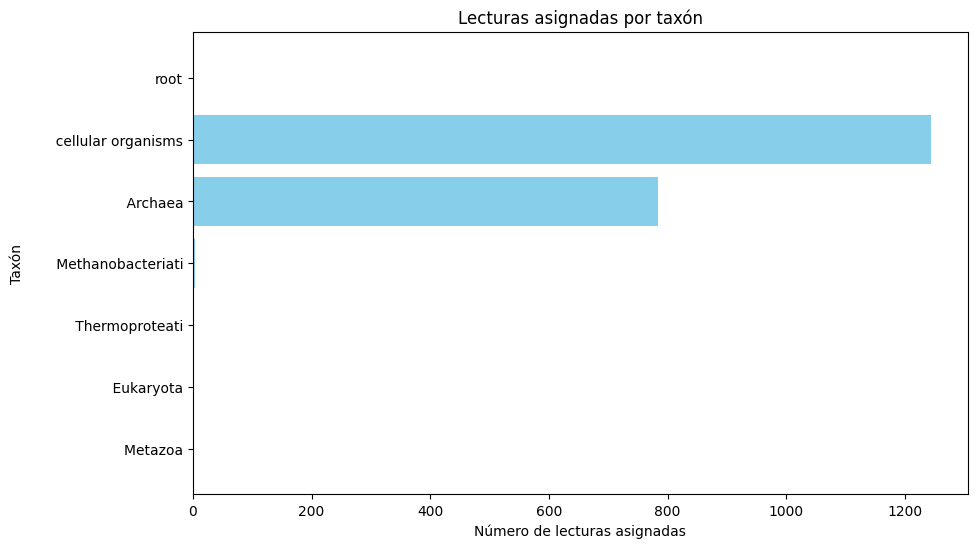

In [8]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar la cantidad de lecturas asignadas por taxón
plt.figure(figsize=(10, 6))
plt.barh(kraken_report_filtered['TaxonName'], kraken_report_filtered['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas asignadas')
plt.ylabel('Taxón')
plt.title('Lecturas asignadas por taxón')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor en la parte superior
plt.show()



### Kraken (versión 2)

In [4]:
!kraken2 --db ~/k2_standard --threads 4 --output B028_24/kraken/kraken_output.txt --report B028_24/kraken/kraken_report.txt B028_24/lighter_out/B028_24_trimgalore1_polyG.cor.fq.gz B028_24/lighter_out/B028_24_trimgalore2_polyG.cor.fq.gz


Loading database information... done.
30626582 sequences (3995.66 Mbp) processed in 164.296s (11184.7 Kseq/m, 1459.19 Mbp/m).
  23167047 sequences classified (75.64%)
  7459535 sequences unclassified (24.36%)


In [56]:
import pandas as pd

# Leer el archivo de reporte Kraken 
kraken_report_path = 'B028_24/kraken/kraken_report.txt' 
kraken_report = pd.read_csv(kraken_report_path, sep='\t', header=None, 
                            names=["Percent", "TotalReads", "AssignedReads", "TaxonLevel", "TaxonID", "TaxonName"])

# Ver los primeros registros del reporte
kraken_report.head(10)


,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
0,24.36,7459535,7459535,U,0,unclassified
1,75.64,23167047,1391,R,1,root
2,75.64,23165653,612,R1,131567,cellular organisms
3,75.63,23164053,301339,D,2,Bacteria
4,74.64,22861093,2889,K,1783272,Bacillati
5,74.63,22858012,2264,P,1239,Bacillota
6,74.63,22855633,1892,C,91061,Bacilli
7,74.62,22853486,43177,O,1385,Bacillales
8,74.47,22808913,42755,F,186817,Bacillaceae
9,74.33,22764981,20870258,G,1386,Bacillus


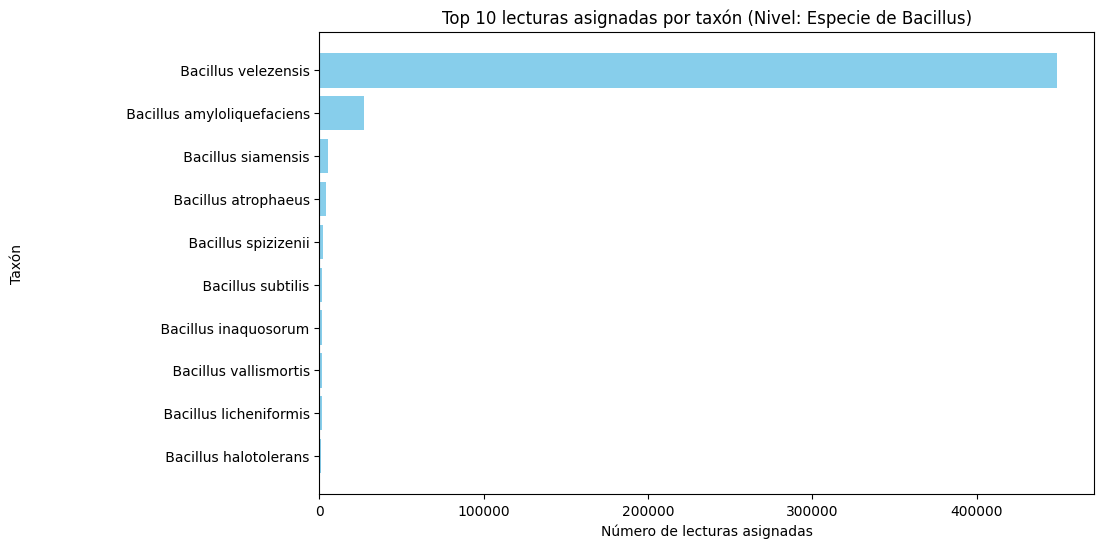

In [25]:
import matplotlib.pyplot as plt

# Filtrar las filas donde 'TaxonName' contiene 'Bacillus' y 'TaxonLevel' es 'S'
bacillus_species_report = kraken_report[(kraken_report['TaxonName'].str.contains('Bacillus', case=False, na=False)) & 
                                        (kraken_report['TaxonLevel'] == 'S')]

# Seleccionar las primeras 10 filas (por ejemplo, las 10 más asignadas)
top_10_bacillus = bacillus_species_report.head(10)

# Crear el gráfico de barras para visualizar la cantidad de lecturas asignadas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bacillus['TaxonName'], top_10_bacillus['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas asignadas')
plt.ylabel('Taxón')
plt.title('Top 10 lecturas asignadas por taxón (Nivel: Especie de Bacillus)')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor en la parte superior
plt.show()




In [19]:
# Filtrar el reporte para mostrar solo los taxones relevantes
kraken_report_filtered = kraken_report[kraken_report["TaxonLevel"].isin(["R", "R1", "R2", "K"])]

# Ver el reporte filtrado
kraken_report_filtered.head(10)

,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
1,75.16,17292604,955,R,1,root
2,75.16,17291644,460,R1,131567,cellular organisms
4,74.23,17077751,2022,K,1783272,Bacillati
1094,0.00,1120,56,K,3379134,Pseudomonadati
1935,0.00,3,0,K,3384189,Fusobacteriati
1945,0.00,3,0,K,3384194,Thermotogati
1962,0.01,1972,0,K,33208,Metazoa
1991,0.00,9,0,K,3366610,Methanobacteriati
2026,0.00,1,0,K,1783275,Thermoproteati
2033,0.00,1,0,K,1935183,Promethearchaeati


In [28]:
# Filtrar las filas donde 'TaxonName' contiene 'Bacillus' y 'TaxonLevel' es 'S'
bacillus_s_report = kraken_report.loc[
    (kraken_report['TaxonName'].str.contains('Bacillus', case=False, na=False)) & 
    (kraken_report['TaxonLevel'] == 'S')
]

# Mostrar el reporte como una tabla (en Jupyter Notebook o un entorno similar)
import pandas as pd
bacillus_s_report.head(10)



,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
12,1.47,451336,449152,S,492670,Bacillus velezensis
24,0.09,28479,27276,S,1390,Bacillus amyloliquefaciens
34,0.02,5375,5375,S,659243,Bacillus siamensis
35,0.01,3964,3941,S,1452,Bacillus atrophaeus
38,0.01,2171,2167,S,96241,Bacillus spizizenii
40,0.01,1559,1502,S,1423,Bacillus subtilis
48,0.00,1421,1421,S,483913,Bacillus inaquosorum
49,0.00,1348,1348,S,72361,Bacillus vallismortis
50,0.00,1300,1300,S,1402,Bacillus licheniformis
52,0.00,758,758,S,260554,Bacillus halotolerans


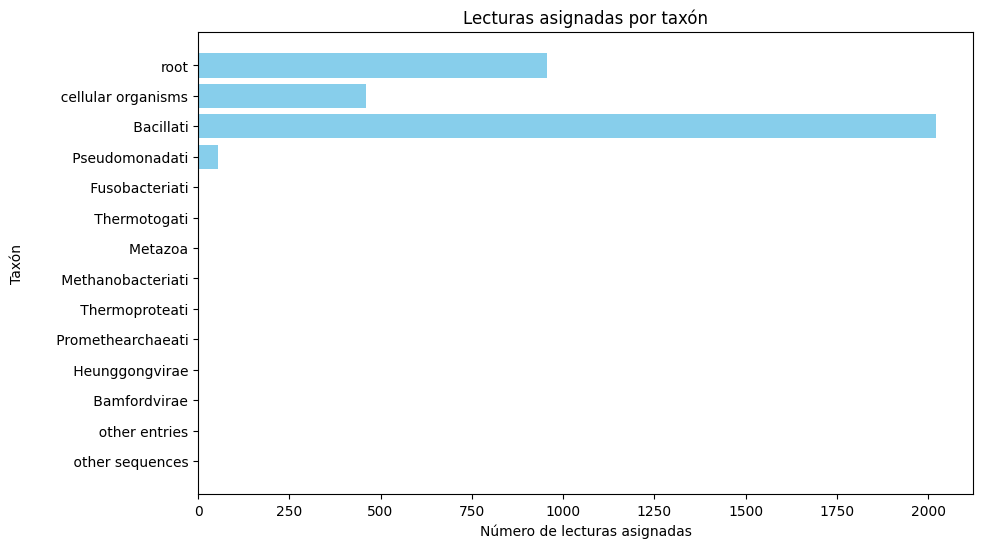

In [35]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar la cantidad de lecturas asignadas por taxón
plt.figure(figsize=(10, 6))
plt.barh(kraken_report_filtered['TaxonName'], kraken_report_filtered['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas asignadas')
plt.ylabel('Taxón')
plt.title('Lecturas asignadas por taxón')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor en la parte superior
plt.show(20)



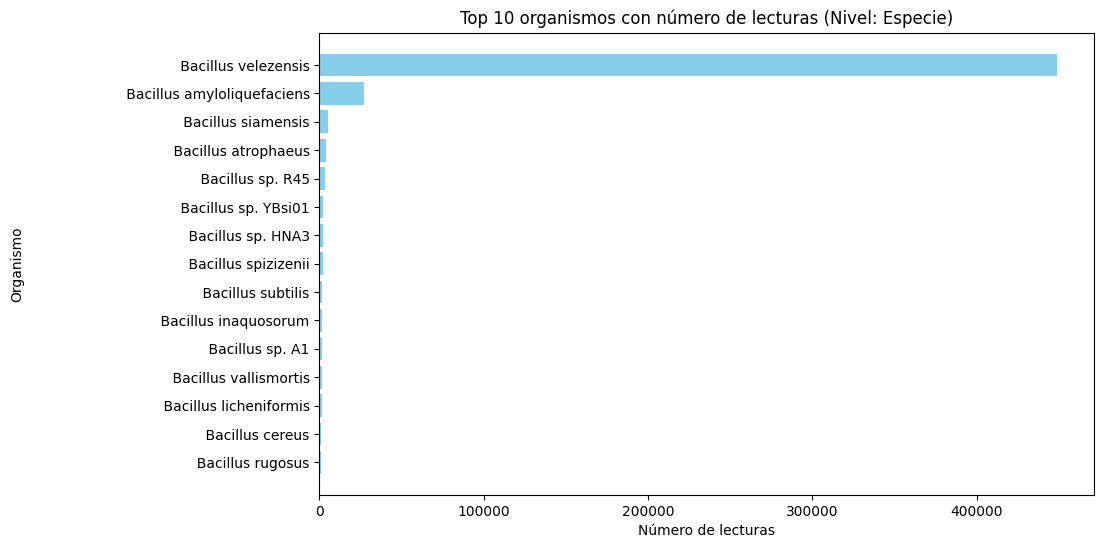

In [59]:
import matplotlib.pyplot as plt

# Filtrar las filas donde 'TaxonLevel' es 'S' (especie)
species_report = kraken_report[kraken_report['TaxonLevel'] == 'S']

# Ordenar el DataFrame por el porcentaje de presencia de las lecturas (de mayor a menor)
sorted_species_report = species_report.sort_values(by='AssignedReads', ascending=False)

# Seleccionar las primeras 10 filas 
top_10_species = sorted_species_report.head(15)

# Crear un gráfico de barras para visualizar el porcentaje de presencia
plt.figure(figsize=(10, 6))
plt.barh(top_10_species['TaxonName'], top_10_species['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas')
plt.ylabel('Organismo')
plt.title('Top 10 organismos con mayor número de lecturas (Nivel: Especie)')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor porcentaje arriba
plt.show()



In [57]:
# Filtrar las filas donde 'TaxonLevel' es 'G' (Género)
genus_report = kraken_report[kraken_report['TaxonLevel'] == 'G']

# Ordenar el DataFrame por el porcentaje de presencia de las lecturas (de mayor a menor)
sorted_genus_report = genus_report.sort_values(by='AssignedReads', ascending=False)

# Mostrar las primeras filas de la tabla clasificada por Género
import pandas as pd
sorted_genus_report[['TaxonName', 'Percent', 'AssignedReads']].head(10)

,TaxonName,Percent,AssignedReads
9,Bacillus,74.33,20870258
991,Pseudomonas,0.00,194
1017,Enterobacter,0.00,92
419,Staphylococcus,0.00,39
356,Paenibacillus,0.00,25
764,Streptomyces,0.00,23
1043,Klebsiella,0.00,16
542,Fructilactobacillus,0.00,12
467,Geobacillus,0.00,8
1035,Kosakonia,0.00,7


## B028_34 (fastqc de las sec cruda)

In [ ]:
!fastqc -o B028_34 B028_34/BO28_34_1.fastq.gz B028_34/BO28_34_2.fastq.gz

In [2]:
!multiqc B028_34/ -o B028_34/multiqc_output/
from IPython.display import IFrame

IFrame("B028_34/multiqc_output/multiqc_report.html", width=1000, height=1000)


/// ]8;id=173007;https://multiqc.info\MultiQC]8;;\ 🔍 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_34
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 8/8  _fastqc.html
            fastqc | Found 2 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_34/multiqc_output/multiqc_data_1
     write_results | Report      : B028_34/multiqc_output/multiqc_report_1.html
           multiqc | MultiQC complete


In [17]:
!trimmomatic PE -threads 4 \
  B028_34/BO28_34_1.fastq.gz B028_34/BO28_34_2.fastq.gz \
  B028_34/BO28_34_1_paired.fq.gz B028_34/BO28_34_1_unpaired.fq.gz \
  B028_34/BO28_34_2_paired.fq.gz B028_34/BO28_34_2_unpaired.fq.gz \
  ILLUMINACLIP:TruSeq3-PE-2.fa:2:30:10 \
  LEADING:3 TRAILING:10 \
  SLIDINGWINDOW:4:18 \
  MINLEN:50
                                    
  #intento 1: trailing 3 y minlen 36 y s. window 4:25   
#intento 2: trailing 15, milen 50 sw 4:20 (multiqc5)

TrimmomaticPE: Started with arguments:
 -threads 4 B028_34/BO28_34_1.fastq.gz B028_34/BO28_34_2.fastq.gz B028_34/BO28_34_1_paired.fq.gz B028_34/BO28_34_1_unpaired.fq.gz B028_34/BO28_34_2_paired.fq.gz B028_34/BO28_34_2_unpaired.fq.gz ILLUMINACLIP:TruSeq3-PE-2.fa:2:30:10 LEADING:3 TRAILING:10 SLIDINGWINDOW:4:18 MINLEN:50
Using PrefixPair: 'TACACTCTTTCCCTACACGACGCTCTTCCGATCT' and 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT'
Using Long Clipping Sequence: 'AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTA'
Using Long Clipping Sequence: 'AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT'
Using Long Clipping Sequence: 'TACACTCTTTCCCTACACGACGCTCTTCCGATCT'
ILLUMINACLIP: Using 1 prefix pairs, 4 forward/reverse sequences, 0 forward only sequences, 0 reverse only sequences
Quality encoding detected as phred33
Input Read Pairs: 11646132 Both Surviving: 11167988 (95,89%) Forward Only Surviving: 294788 (2,53%) Reverse Only Surviving: 127671 (1,10%) Dropped: 55685 (0,48%)


In [18]:
!trim_galore --paired --clip_R1 10 --clip_R2 10 --three_prime_clip_R1 10 --three_prime_clip_R2 10 --quality 20 --length 50 --fastqc -o B028_34/fastqc2 --basename B028_34_trimgalore  B028_34/BO28_34_1.fastq.gz B028_34/BO28_34_2.fastq.gz

#intento1: 15 en clips, quality en 20

Multicore support not enabled. Proceeding with single-core trimming.
Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 4.4
single-core operation.
igzip command line interface 2.30.0
igzip detected. Using igzip for decompressing

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output directory B028_34/fastqc2/ doesn't exist, creating it for you...

Output will be written into the directory: /home/male/Bacillus/B028_34/fastqc2/
Using user-specified basename (>>B028_34_trimgalore<<) instead of deriving the filename from the input file(s)
igzip: Error encountered while writing to file (null)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> B028_34/BO28_34_1.fastq.gz <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences a

10000000 sequences processed
This is cutadapt 4.4 with Python 3.12.3
Command line parameters: -j 1 -e 0.1 -q 20 -O 1 -a AGATCGGAAGAGC B028_34/BO28_34_2.fastq.gz
Processing single-end reads on 1 core ...
Finished in 489.585 s (42.038 µs/read; 1.43 M reads/minute).

=== Summary ===

Total reads processed:              11,646,132
Reads with adapters:                 3,767,652 (32.4%)
Reads written (passing filters):    11,646,132 (100.0%)

Total basepairs processed: 1,758,565,932 bp
Quality-trimmed:               6,226,297 bp (0.4%)
Total written (filtered):  1,746,929,953 bp (99.3%)

=== Adapter 1 ===

Sequence: AGATCGGAAGAGC; Type: regular 3'; Length: 13; Trimmed: 3767652 times

Minimum overlap: 1
No. of allowed errors:
1-9 bp: 0; 10-13 bp: 1

Bases preceding removed adapters:
  A: 37.1%
  C: 26.0%
  G: 21.1%
  T: 15.7%
  none/other: 0.0%

Overview of removed sequences
length	count	expect	max.err	error counts
1	2903480	2911533.0	0	2903480
2	607845	727883.2	0	607845
3	180713	181970.8	0	1

In [19]:
!fastqc -o B028_34/fastqc2 B028_34/BO28_34_1_paired.fq.gz B028_34/BO28_34_2_paired.fq.gz

application/gzip
application/gzip
Started analysis of BO28_34_1_paired.fq.gz
Approx 5% complete for BO28_34_1_paired.fq.gz
Approx 10% complete for BO28_34_1_paired.fq.gz
Approx 15% complete for BO28_34_1_paired.fq.gz
Approx 20% complete for BO28_34_1_paired.fq.gz
Approx 25% complete for BO28_34_1_paired.fq.gz
Approx 30% complete for BO28_34_1_paired.fq.gz
Approx 35% complete for BO28_34_1_paired.fq.gz
Approx 40% complete for BO28_34_1_paired.fq.gz
Approx 45% complete for BO28_34_1_paired.fq.gz
Approx 50% complete for BO28_34_1_paired.fq.gz
Approx 55% complete for BO28_34_1_paired.fq.gz
Approx 60% complete for BO28_34_1_paired.fq.gz
Approx 65% complete for BO28_34_1_paired.fq.gz
Approx 70% complete for BO28_34_1_paired.fq.gz
Approx 75% complete for BO28_34_1_paired.fq.gz
Approx 80% complete for BO28_34_1_paired.fq.gz
Approx 85% complete for BO28_34_1_paired.fq.gz
Approx 90% complete for BO28_34_1_paired.fq.gz
Approx 95% complete for BO28_34_1_paired.fq.gz
Analysis complete for BO28_34_1

In [20]:
!multiqc B028_34/fastqc2/ -o B028_34/multiqc_output/



/// ]8;id=459262;https://multiqc.info\MultiQC]8;;\ 🔍 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_34/fastqc2
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 12/12  m B028_34/fastqc2/BO28_34_1_paired_fastqc.zip
          cutadapt | Found 2 reports
            fastqc | Found 4 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_34/multiqc_output/multiqc_data_1_2_3_4_5_6
     write_results | Report      : B028_34/multiqc_output/multiqc_report_6.html
           multiqc | MultiQC complete


In [21]:
from IPython.display import IFrame

IFrame("B028_34/multiqc_output/multiqc_report_6.html", width=1000, height=1000) #3 ha sido el "mejor"



### Edición de colas poly G

In [11]:

!fastp -i B028_34/fastqc2/B028_34_trimgalore_val_1.fq.gz -I B028_34/fastqc2/B028_34_trimgalore_val_2.fq.gz \
  -o B028_34/B028_34_trimgalore1_polyG.fq.gz -O B028_34/B028_34_trimgalore2_polyG.fq.gz \
  --trim_poly_g

Read1 before filtering:
total reads: 11593873
total bases: 1512486850
Q20 bases: 1498692817(99.088%)
Q30 bases: 1437486677(95.0413%)

Read2 before filtering:
total reads: 11593873
total bases: 1512191383
Q20 bases: 1496801084(98.9823%)
Q30 bases: 1441644542(95.3348%)

Read1 after filtering:
total reads: 11503730
total bases: 1500691381
Q20 bases: 1487953898(99.1512%)
Q30 bases: 1428615515(95.1972%)

Read2 after filtering:
total reads: 11503730
total bases: 1500501915
Q20 bases: 1488655189(99.2105%)
Q30 bases: 1437347123(95.7911%)

Filtering result:
reads passed filter: 23007460
reads failed due to low quality: 93570
reads failed due to too many N: 4634
reads failed due to too short: 82082
reads with adapter trimmed: 3782
bases trimmed due to adapters: 185542

Duplication rate: 4.60484%

Insert size peak (evaluated by paired-end reads): 0

JSON report: fastp.json
HTML report: fastp.html

fastp -i B028_34/fastqc2/B028_34_trimgalore_val_1.fq.gz -I B028_34/fastqc2/B028_34_trimgalore_val_2.

In [1]:
!lighter -r B028_34/B028_34_trimgalore1_polyG.fq.gz -r B028_34/B028_34_trimgalore2_polyG.fq.gz -k 19 -maxcor 2 -od B028_34/lighter_out -t 8


[2025-03-20 10:36:29] =============Start====================
[2025-03-20 10:36:31] Bad quality threshold is "9"
[2025-03-20 10:39:58] Finish sampling kmers
[2025-03-20 10:39:58] Bloom filter A's false positive rate: 0.971402
[2025-03-20 10:39:58] The error rate is high. Lighter adjusts -maxcor to 5 and bad quality threshold to ":".
[2025-03-20 10:42:15] Finish storing trusted kmers
[2025-03-20 10:57:27] Finish error correction
Processed 23007460 reads:
	7 are error-free
	Corrected 0 bases(0.000000 corrections for reads with errors)
	Trimmed 0 reads with average trimmed bases 0.000000
	Discard 0 reads


In [3]:
!fastqc -o B028_34/fastqc2 B028_34/B028_34_trimgalore1_polyG.fq.gz B028_34/B028_34_trimgalore2_polyG.fq.gz B028_34/lighter_out/B028_34_trimgalore1_polyG.cor.fq.gz B028_34/lighter_out/B028_34_trimgalore2_polyG.cor.fq.gz

application/gzip
application/gzip
application/gzip
application/gzip
Started analysis of B028_34_trimgalore1_polyG.fq.gz
Approx 5% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 10% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 15% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 20% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 25% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 30% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 35% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 40% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 45% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 50% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 55% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 60% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 65% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 70% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 75% complete for B028_34_trimgalore1_polyG.fq.gz
Approx 80% complete for B028_34_trimgalor

In [4]:
!multiqc B028_34/fastqc2/ -o B028_34/multiqc_output/


/// ]8;id=884696;https://multiqc.info\MultiQC]8;;\ 🔍 v1.27.1

       file_search | Search path: /home/male/Bacillus/B028_34/fastqc2
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 24/24  18/24 B028_34/fastqc2/BO28_34_2_fastqc.html
          cutadapt | Found 2 reports
            fastqc | Found 10 reports
     write_results | Existing reports found, adding suffix to filenames. Use '--force' to overwrite.
     write_results | Data        : B028_34/multiqc_output/multiqc_data_1_2_3_4_5_6_7_8_9_10_11
     write_results | Report      : B028_34/multiqc_output/multiqc_report_11.html
           multiqc | MultiQC complete


In [2]:
from IPython.display import IFrame

IFrame("B028_34/multiqc_output/multiqc_report_11.html", width=1000, height=1000) #3 ha sido el "mejor"



### Kraken (versión 1)

In [8]:
!kraken2 --db ~/kraken_db --threads 4 --output B028_34/kraken/kraken_output.txt --report B028_34/kraken/kraken_report.txt B028_34/lighter_out/B028_34_trimgalore1_polyG.cor.fq.gz B028_34/lighter_out/B028_34_trimgalore2_polyG.cor.fq.gz


Loading database information... done.
23007460 sequences (3001.19 Mbp) processed in 183.225s (7534.2 Kseq/m, 982.79 Mbp/m).
  94086 sequences classified (0.41%)
  22913374 sequences unclassified (99.59%)


In [9]:
import pandas as pd

# Leer el archivo de reporte Kraken 
kraken_report_path = 'B028_34/kraken/kraken_report.txt'  
kraken_report = pd.read_csv(kraken_report_path, sep='\t', header=None, 
                            names=["Percent", "TotalReads", "AssignedReads", "TaxonLevel", "TaxonID", "TaxonName"])

# Ver los primeros registros del reporte
kraken_report.head()

,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
0,99.59,22913374,22913374,U,0,unclassified
1,0.41,94086,0,R,1,root
2,0.41,94086,1068,R1,131567,cellular organisms
3,0.36,83550,564,R2,2157,Archaea
4,0.36,82399,0,K,3366610,Methanobacteriati


In [10]:
# Filtrar el reporte para mostrar solo los taxones relevantes
kraken_report_filtered = kraken_report[kraken_report["TaxonLevel"].isin(["R", "R1", "R2", "K"])]

# Ver el reporte filtrado
kraken_report_filtered.head()


,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
1,0.41,94086,0,R,1,root
2,0.41,94086,1068,R1,131567,cellular organisms
3,0.36,83550,564,R2,2157,Archaea
4,0.36,82399,0,K,3366610,Methanobacteriati
205,0.00,585,0,K,1783275,Thermoproteati


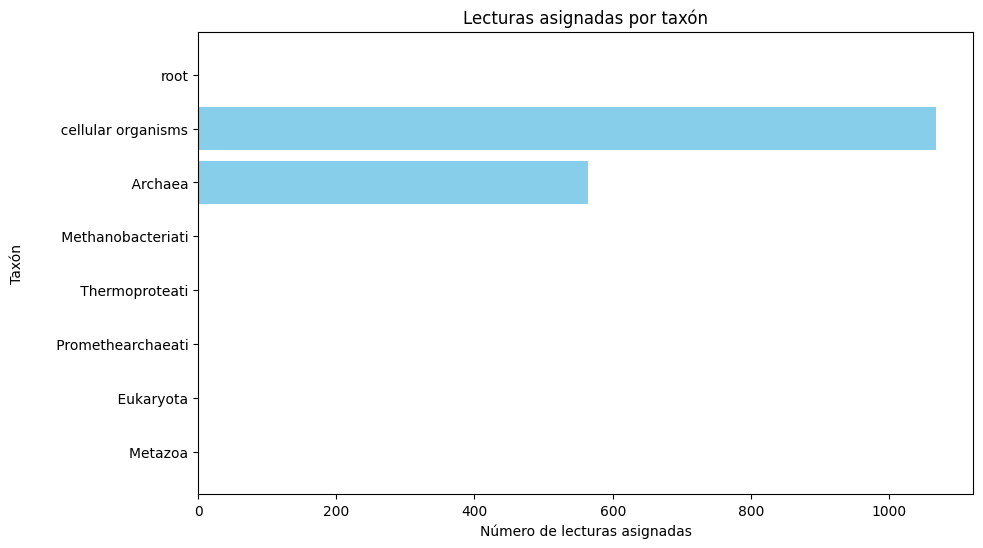

In [11]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar la cantidad de lecturas asignadas por taxón
plt.figure(figsize=(10, 6))
plt.barh(kraken_report_filtered['TaxonName'], kraken_report_filtered['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas asignadas')
plt.ylabel('Taxón')
plt.title('Lecturas asignadas por taxón')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor en la parte superior
plt.show()



### Kraken2 (versión 2)

In [12]:
!kraken2 --db ~/k2_standard --threads 4 --output B028_34/kraken/kraken_output.txt --report B028_34/kraken/kraken_report.txt B028_34/lighter_out/B028_34_trimgalore1_polyG.cor.fq.gz B028_34/lighter_out/B028_34_trimgalore2_polyG.cor.fq.gz


Loading database information... done.
23007460 sequences (3001.19 Mbp) processed in 108.664s (12703.8 Kseq/m, 1657.14 Mbp/m).
  17292604 sequences classified (75.16%)
  5714856 sequences unclassified (24.84%)


In [39]:
import pandas as pd

# Leer el archivo de reporte Kraken 
kraken_report_path = 'B028_34/kraken/kraken_report.txt' 
kraken_report = pd.read_csv(kraken_report_path, sep='\t', header=None, 
                            names=["Percent", "TotalReads", "AssignedReads", "TaxonLevel", "TaxonID", "TaxonName"])

# Ver los primeros registros del reporte
kraken_report.head(10)


,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
0,24.84,5714856,5714856,U,0,unclassified
1,75.16,17292604,955,R,1,root
2,75.16,17291644,460,R1,131567,cellular organisms
3,75.15,17289201,210306,D,2,Bacteria
4,74.23,17077751,2022,K,1783272,Bacillati
5,74.22,17075546,1787,P,1239,Bacillota
6,74.21,17073587,1781,C,91061,Bacilli
7,74.20,17071454,29734,O,1385,Bacillales
8,74.06,17040389,31031,F,186817,Bacillaceae
9,73.93,17008265,15593562,G,1386,Bacillus


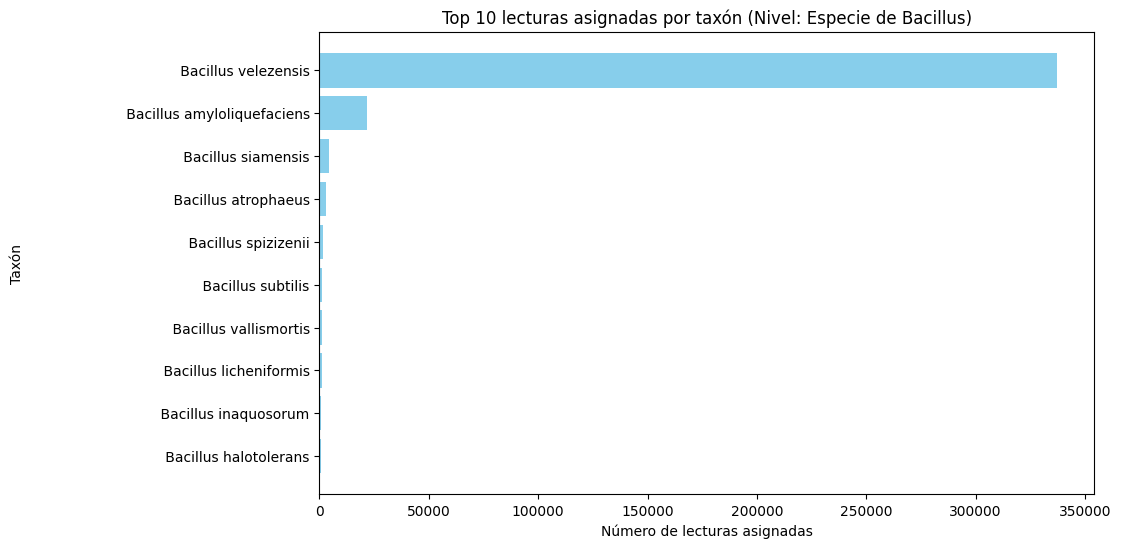

In [40]:
import matplotlib.pyplot as plt

# Filtrar las filas donde 'TaxonName' contiene 'Bacillus' y 'TaxonLevel' es 'S'
bacillus_species_report = kraken_report[(kraken_report['TaxonName'].str.contains('Bacillus', case=False, na=False)) & 
                                        (kraken_report['TaxonLevel'] == 'S')]

# Seleccionar las primeras 10 filas (por ejemplo, las 10 más asignadas)
top_10_bacillus = bacillus_species_report.head(10)

# Crear el gráfico de barras para visualizar la cantidad de lecturas asignadas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bacillus['TaxonName'], top_10_bacillus['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas asignadas')
plt.ylabel('Taxón')
plt.title('Top 10 lecturas asignadas por taxón (Nivel: Especie de Bacillus)')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor en la parte superior
plt.show()




In [50]:
# Filtrar el reporte para mostrar solo los taxones relevantes
kraken_report_filtered = kraken_report[kraken_report["TaxonLevel"].isin(["R1", "R2", "K"])]

# Ver el reporte filtrado
kraken_report_filtered.head(10)

,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
2,75.16,17291644,460,R1,131567,cellular organisms
4,74.23,17077751,2022,K,1783272,Bacillati
1094,0.00,1120,56,K,3379134,Pseudomonadati
1935,0.00,3,0,K,3384189,Fusobacteriati
1945,0.00,3,0,K,3384194,Thermotogati
1962,0.01,1972,0,K,33208,Metazoa
1991,0.00,9,0,K,3366610,Methanobacteriati
2026,0.00,1,0,K,1783275,Thermoproteati
2033,0.00,1,0,K,1935183,Promethearchaeati
2042,0.00,3,0,K,2731360,Heunggongvirae


In [42]:
# Filtrar las filas donde 'TaxonName' contiene 'Bacillus' y 'TaxonLevel' es 'S'
bacillus_s_report = kraken_report.loc[
    (kraken_report['TaxonName'].str.contains('Bacillus', case=False, na=False)) & 
    (kraken_report['TaxonLevel'] == 'S')
]

# Mostrar el reporte como una tabla (en Jupyter Notebook o un entorno similar)
import pandas as pd
bacillus_s_report.head(10)



,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
12,1.47,339098,337440,S,492670,Bacillus velezensis
23,0.10,22800,21916,S,1390,Bacillus amyloliquefaciens
33,0.02,4330,4330,S,659243,Bacillus siamensis
34,0.01,3100,3054,S,1452,Bacillus atrophaeus
37,0.01,1586,1576,S,96241,Bacillus spizizenii
39,0.01,1262,1211,S,1423,Bacillus subtilis
49,0.00,1147,1147,S,72361,Bacillus vallismortis
50,0.00,1007,1007,S,1402,Bacillus licheniformis
51,0.00,951,951,S,483913,Bacillus inaquosorum
53,0.00,625,625,S,260554,Bacillus halotolerans


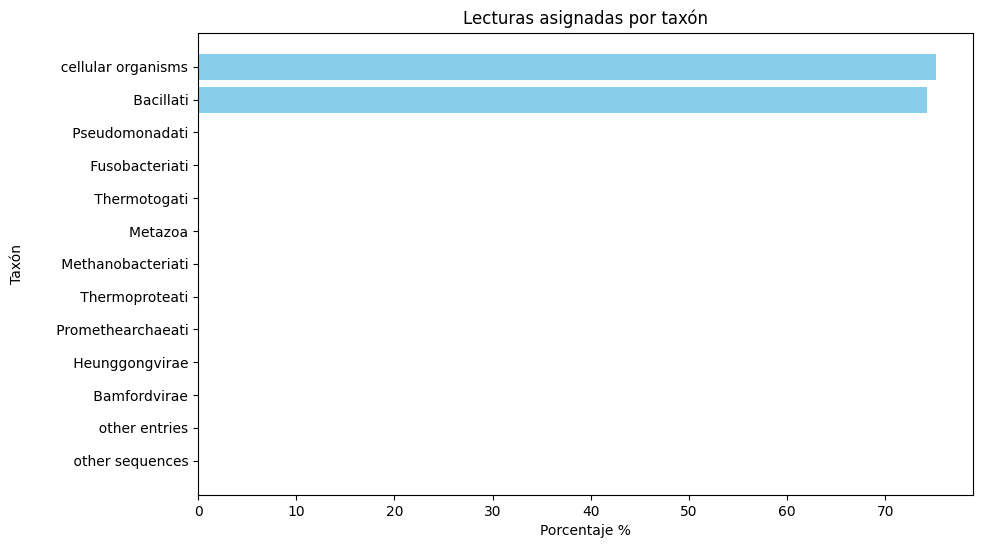

In [55]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar la cantidad de lecturas asignadas por taxón
plt.figure(figsize=(10, 6))
plt.barh(kraken_report_filtered['TaxonName'], kraken_report_filtered['Percent'], color='skyblue')
plt.xlabel('Porcentaje %')
plt.ylabel('Taxón')
plt.title('Lecturas asignadas por taxón')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor en la parte superior
plt.show()



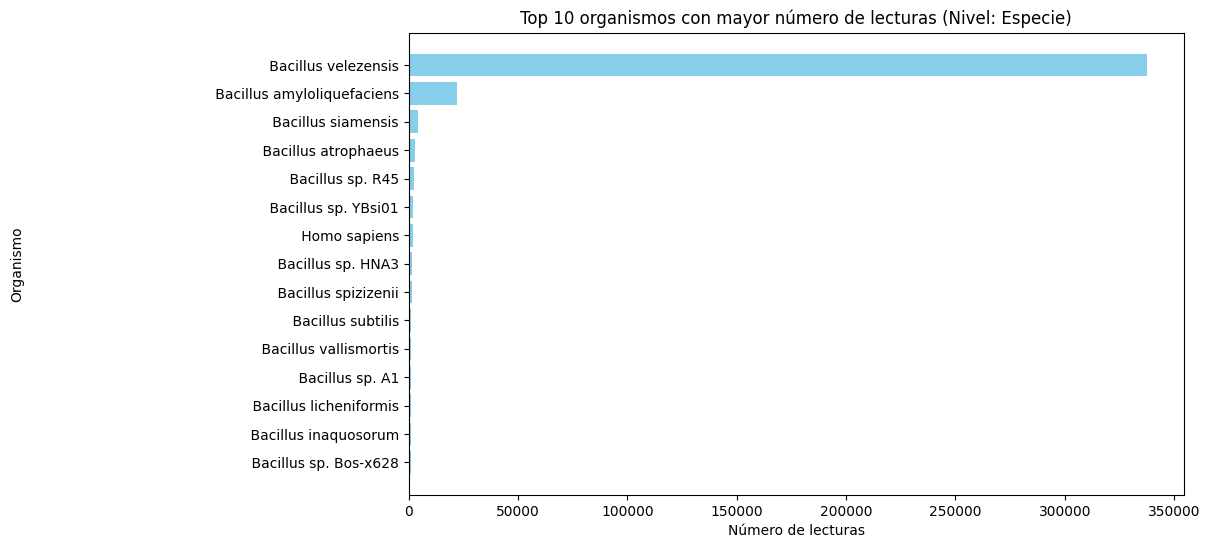

In [45]:
import matplotlib.pyplot as plt

# Filtrar las filas donde 'TaxonLevel' es 'S' (especie)
species_report = kraken_report[kraken_report['TaxonLevel'] == 'S']

# Ordenar el DataFrame por el porcentaje de presencia de las lecturas (de mayor a menor)
sorted_species_report = species_report.sort_values(by='AssignedReads', ascending=False)

# Seleccionar las primeras 10 filas 
top_10_species = sorted_species_report.head(15)

# Crear un gráfico de barras para visualizar el porcentaje de presencia
plt.figure(figsize=(10, 6))
plt.barh(top_10_species['TaxonName'], top_10_species['AssignedReads'], color='skyblue')
plt.xlabel('Número de lecturas')
plt.ylabel('Organismo')
plt.title('Top 10 organismos con mayor número de lecturas (Nivel: Especie)')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor porcentaje arriba
plt.show()



In [62]:
# Filtrar las filas donde 'TaxonLevel' es 'G' (Género)
genus_report = kraken_report[kraken_report['TaxonLevel'] == 'D']

# Ordenar el DataFrame por el porcentaje de presencia de las lecturas (de mayor a menor)
sorted_genus_report = genus_report.sort_values(by='AssignedReads', ascending=False)

# Mostrar las primeras filas de la tabla clasificada por Género
import pandas as pd
sorted_genus_report[['TaxonName', 'Percent', 'AssignedReads']].head(10)


,TaxonName,Percent,AssignedReads
3,Bacteria,75.63,301339
1735,Eukaryota,0.00,0
1765,Archaea,0.00,0
1805,Viruses,0.00,0


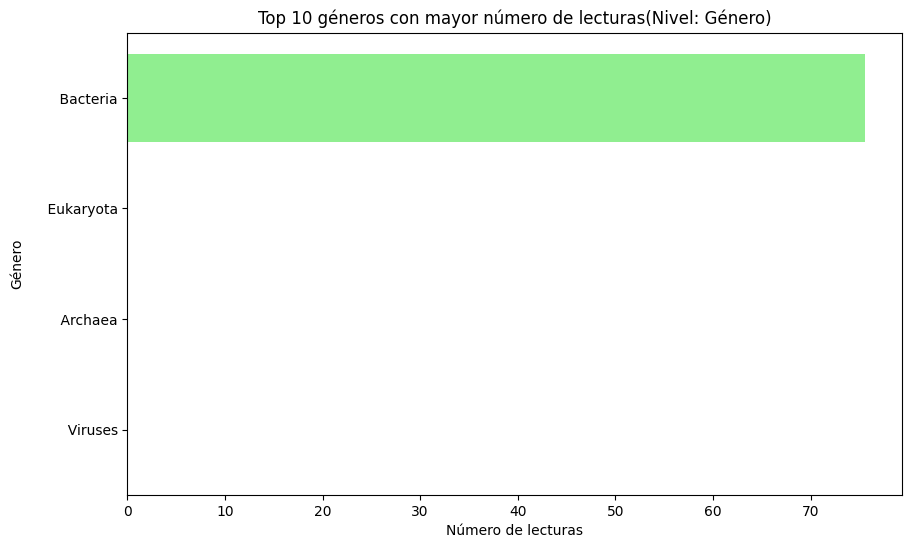

In [61]:
import matplotlib.pyplot as plt

# Filtrar las filas donde 'TaxonLevel' es 'G' (género)
genus_report = kraken_report[kraken_report['TaxonLevel'] == 'D']

# Ordenar el DataFrame por el porcentaje de presencia de las lecturas (de mayor a menor)
sorted_genus_report = genus_report.sort_values(by='Percent', ascending=False)

# Seleccionar las primeras 10 filas (si quieres limitar el número de géneros mostrados)
top_10_genus = sorted_genus_report.head(10)

# Crear un gráfico de barras para visualizar el porcentaje de presencia por género
plt.figure(figsize=(10, 6))
plt.barh(top_10_genus['TaxonName'], top_10_genus['Percent'], color='lightgreen')
plt.xlabel('Número de lecturas')
plt.ylabel('Género')
plt.title('Top 10 géneros con mayor número de lecturas(Nivel: Género)')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor porcentaje arriba
plt.show()


## Pruebas con la nueva BD con una subsecuencia

In [1]:
ls ~/k2_standard

database100mers.kmer_distrib  library/
database150mers.kmer_distrib  library_report.tsv
database200mers.kmer_distrib  names.dmp
database250mers.kmer_distrib  nodes.dmp
database300mers.kmer_distrib  opts.k2d
database50mers.kmer_distrib   seqid2taxid.map
database75mers.kmer_distrib   taxo.k2d
hash.k2d                      taxonomy/
inspect.txt                   unmapped_accessions.txt


In [10]:
!kraken2 --db ~/k2_standard --threads 4 --output B028_24/sub/kraken_output_2.txt --report B028_24/sub/kraken_report_2.txt B028_24/sub/lighter_out/1_polyG.cor.fq B028_24/sub/lighter_out/2_polyG.cor.fq

Loading database information... done.
3062230 sequences (399.51 Mbp) processed in 8.136s (22582.8 Kseq/m, 2946.25 Mbp/m).
  2342535 sequences classified (76.50%)
  719695 sequences unclassified (23.50%)


In [4]:
import pandas as pd

# Leer el archivo de reporte Kraken 
kraken_report_path = '~/Bacillus/ensamblaje/24_kraken_report.txt'  
kraken_report = pd.read_csv(kraken_report_path, sep='\t', header=None, 
                            names=["Percent", "TotalReads", "AssignedReads", "TaxonLevel", "TaxonID", "TaxonName"])

# Ver los primeros registros del reporte
kraken_report.head()

,Percent,TotalReads,AssignedReads,TaxonLevel,TaxonID,TaxonName
0,9.09,1,1,U,0,unclassified
1,90.91,10,0,R,1,root
2,90.91,10,0,R1,131567,cellular organisms
3,90.91,10,1,R2,2,Bacteria
4,81.82,9,0,K,1783272,Bacillati
